In [1]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn.decomposition import PCA
from sklearn import preprocessing
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
experiments, outcomes = load_results("data/generated/genscen_Overijssel_5000_05-06-2021-19-07-26.tar.gz")
dike_model, planning_steps = get_model_for_problem_formulation("Overijssel")
uncertainties = [uncertainty.name for uncertainty in dike_model.uncertainties]

In [3]:
#possible pca_preprocessing

In [4]:
norm_outcomes = preprocessing.normalize(pd.DataFrame(outcomes), axis=0)

In [5]:
pca = PCA(n_components=1)
pca.fit(norm_outcomes.T)
y = pd.Series(pca.components_[0])
x = experiments[uncertainties]

In [6]:
y.sort_values(ascending=True)

768    -0.035479
4376   -0.033334
1675   -0.033239
3312   -0.033130
1861   -0.032978
          ...   
537     0.043332
2390    0.043623
2919    0.044010
2687    0.044174
66      0.044527
Length: 5000, dtype: float64

In [7]:
prim_alg = prim.Prim(x, y > 0, threshold=0.9)

In [8]:
box = prim_alg.find_box()

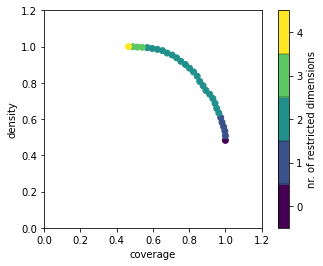

In [9]:
box.show_tradeoff()
plt.show()

In [10]:
box_id=20

coverage     0.70576
density     0.953527
id                20
mass          0.3572
mean        0.953527
res_dim            2
Name: 20, dtype: object

             box 20                                           
                min       max                        qp values
A.5_pfail  0.000173  0.734998   [-1.0, 1.0714439983646967e-70]
A.4_pfail  0.514897  0.999874  [2.2022821911636127e-285, -1.0]



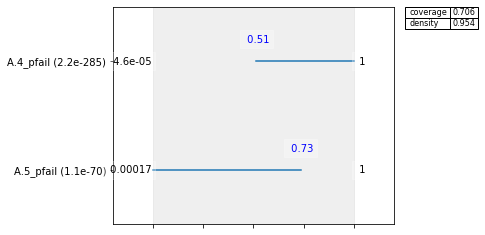

In [11]:
box.inspect(box_id)
box.inspect(box_id, style='graph')
plt.show()

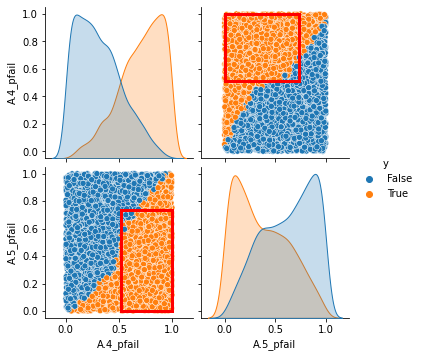

In [12]:
box.select(box_id)
box.show_pairs_scatter()

In [13]:
lims = box.box_lims[box_id]

In [14]:
# so now we just need to get scenarios that meet these ranges

In [15]:
conditions = []

for column in lims.columns:
    if isinstance(lims[column][0], set):
        conditions.append(experiments[column].isin(lims[column][0]))
    else:
        conditions.append(experiments[column] >= lims[column][0])
        conditions.append(experiments[column] <= lims[column][1])

df = pd.DataFrame(conditions).T

In [16]:
experiments.iloc[df[(df== False).any(axis=1)].index]

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,A.0_ID flood wave shape,...,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Policy 0,dikesnet
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Policy 0,dikesnet
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,Policy 0,dikesnet
5,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,Policy 0,dikesnet
6,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4991,Policy 0,dikesnet
4993,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,108.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4993,Policy 0,dikesnet
4995,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4995,Policy 0,dikesnet
4996,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4996,Policy 0,dikesnet
